##**Recommendation System** :

In [2]:
import pandas as pd
df = pd.read_csv("/content/anime.csv")

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df.columns


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [8]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [9]:
# HAndling missing values
df['genre'].fillna("Unknown", inplace=True)
df['type'].fillna("Unknown", inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)


<ipython-input-9-f087c2d1b1cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna("Unknown", inplace=True)
<ipython-input-9-f087c2d1b1cc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [10]:
df.isnull().sum()


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


array([[<Axes: title={'center': 'anime_id'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'members'}>, <Axes: >]], dtype=object)

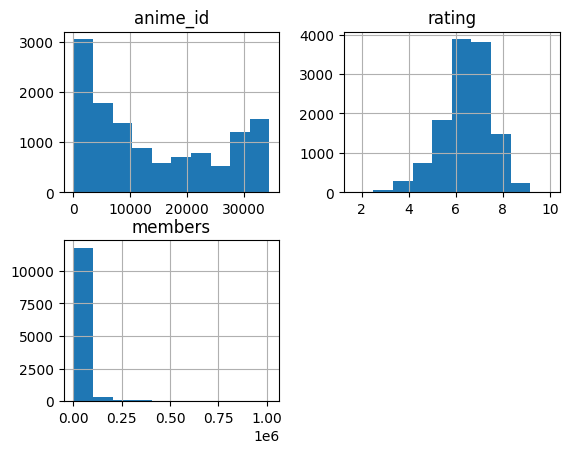

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist()

Text(0.5, 1.0, 'Heat map')

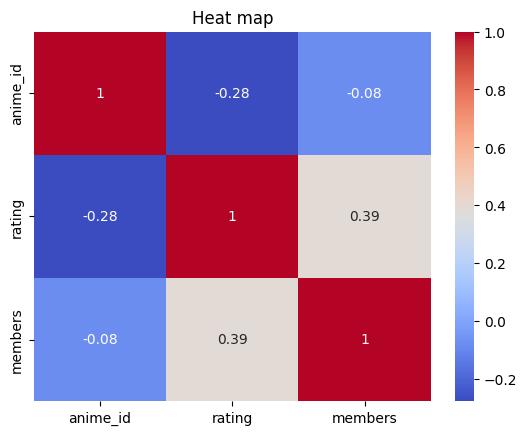

In [13]:
w = df.corr(numeric_only=True)

sns.heatmap(w, annot=True, cmap='coolwarm')
plt.title("Heat map")

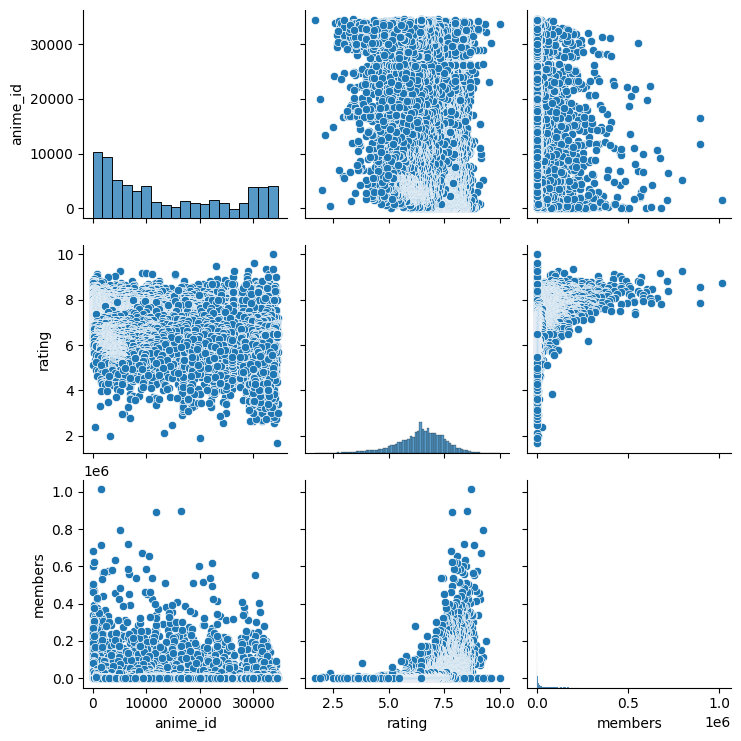

In [15]:
# Pairplot
sns.pairplot(df)

In [16]:
# Convert 'episodes' column to numeric (replace "Unknown" with NaN and fill with median)

df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df['episodes'].fillna(df['episodes'].median(), inplace=True)

<ipython-input-16-38a825322156>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].median(), inplace=True)


In [17]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [18]:
# converting it into a numerical format using multi-hot encoding (One-Hot Encoding).

from sklearn.preprocessing import MultiLabelBinarizer

df['genre'] = df['genre'].apply(lambda x: x.split(",") if x != "Unknown" else [])


In [19]:
# One-hot encode the genres

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_)

In [20]:
# Concatenate with the original dataset
anime_processed = pd.concat([df, genre_encoded], axis=1)

# Drop the original genre column
anime_processed.drop(columns=["genre"], inplace=True)

anime_processed.head()

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,9.25,114262,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,TV,51.0,9.16,151266,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# implement the cosine similarity-based recommendation system, using these features along with rating, episodes, and members.


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Selecting features for similarity computation
feature_columns = ["rating", "episodes", "members"] + list(mlb.classes_)
anime_features = anime_processed[feature_columns]

In [24]:
# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
anime_features[["rating", "episodes", "members"]] = scaler.fit_transform(anime_features[["rating", "episodes", "members"]])

<ipython-input-24-7ad52a63e374>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_features[["rating", "episodes", "members"]] = scaler.fit_transform(anime_features[["rating", "episodes", "members"]])


In [25]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(anime_features)

# Function to get recommendations based on cosine similarity
def recommend_anime(title, top_n=10):
    idx = anime_processed.index[anime_processed["name"] == title].tolist()

    if not idx:
        return f"Anime '{title}' not found in the dataset."

    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    anime_indices = [i[0] for i in sim_scores]

    return anime_processed.iloc[anime_indices][["name", "rating"]]

# Example: Get recommendations for "Steins;Gate"
recommend_anime("Steins;Gate")

,name,rating
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.610000
126,Steins;Gate: Oukoubakko no Poriomania,8.460000
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.340000
10898,Steins;Gate 0,6.473902
5283,Final Fantasy: The Spirits Within,6.500000
1578,Sakasama no Patema: Beginning of the Day,7.500000
1594,Mai-Otome 0: S.ifr,7.490000
9091,Kaitei Toshi no Dekiru made,8.000000
10414,Subarashii Sekai Ryokou: New York Tabi &quot;C...,8.000000
3492,Glass no Hana to Kowasu Sekai,6.970000


In [26]:
#  implementing a more memory-efficient approach using Nearest Neighbors (k-NN) with cosine distance


In [27]:
from sklearn.neighbors import NearestNeighbors

# Fit k-NN model with cosine distance

knn_model = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=11)
knn_model.fit(anime_features)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=11)

In [28]:
# Function to get recommendations using k-NN
def recommend_anime_knn(title, top_n=10):
    idx = anime_processed.index[anime_processed["name"] == title].tolist()

    if not idx:
        return f"Anime '{title}' not found in the dataset."

    idx = idx[0]

    # Find nearest neighbors
    distances, indices = knn_model.kneighbors([anime_features.iloc[idx]], n_neighbors=top_n+1)

    # Get recommended anime names
    recommendations = anime_processed.iloc[indices[0][1:]][["name", "rating"]]

    return recommendations

# Example: Get recommendations for "Steins;Gate"
recommend_anime_knn("Steins;Gate")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,name,rating
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.610000
126,Steins;Gate: Oukoubakko no Poriomania,8.460000
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.340000
10898,Steins;Gate 0,6.473902
5283,Final Fantasy: The Spirits Within,6.500000
1578,Sakasama no Patema: Beginning of the Day,7.500000
1594,Mai-Otome 0: S.ifr,7.490000
9091,Kaitei Toshi no Dekiru made,8.000000
10414,Subarashii Sekai Ryokou: New York Tabi &quot;C...,8.000000
3492,Glass no Hana to Kowasu Sekai,6.970000


In [29]:
print(recommend_anime_knn("Naruto"))
print(recommend_anime_knn("Attack on Titan"))

                                                   name  rating
615                                  Naruto: Shippuuden    7.94
1472        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...    7.50
486                            Boruto: Naruto the Movie    8.03
1343                                        Naruto x UT    7.58
2997  Naruto Soyokazeden Movie: Naruto to Mashin to ...    7.11
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...    7.68
2458               Naruto Shippuuden: Sunny Side Battle    7.26
175                              Katekyo Hitman Reborn!    8.37
7628                            Kyutai Panic Adventure!    5.21
Anime 'Attack on Titan' not found in the dataset.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## **Interview Questions & Answers** :
1. Can you explain the difference between user-based and item-based collaborative filtering?
- User-based collaborative filtering recommends anime by finding users with similar preferences, while item-based collaborative filtering recommends anime based on similarities between anime watched by users.
2. What is collaborative filtering, and how does it work?
- Collaborative filtering is a recommendation technique that predicts user preferences by analyzing patterns in user behavior, either by finding similar users (user-based) or similar items (item-based).